In [1]:
import cv2
import matplotlib.pyplot as plt

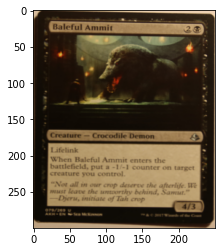

In [5]:
num = 1
totalPics = 30              # Set up variables

while num < 31 :            # 30 images prepared in given folder
    image = cv2.imread("demo/Pics/img" + str(num) + ".JPG", cv2.IMREAD_UNCHANGED)
    scale_percent = 20      # percent of original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    scale_percent = 20      # percent of original size
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gray, 130, 255, 1)

    cnts = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    
    for c in cnts:
        x,y,w,h = cv2.boundingRect(c)
        ROI = image[y:y+h, x:x+w]
        break
    
                            # Find new width/height of extracted image.
    width2 = int(ROI.shape[1] * scale_percent / 100)
    height2 = int(ROI.shape[0] * scale_percent / 100)
    
    if width2 > height2:    # If width more than height, it's sideways.
        ROI = cv2.rotate(ROI, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
    
    width = 250             # Set up width and height to resize
    height = 300
    dim = (width, height)
 
                            # resize image
    ROI = cv2.resize(ROI, dim, interpolation = cv2.INTER_AREA)

    path = 'demo/Results'
    isExist = os.path.exists(path)
        if not isExist :        os.makedirs(path)        cv2.imwrite("demo/Results/card" + str(num) + ".png", ROI)

    ROI= cv2.cvtColor(ROI, cv2.COLOR_BGR2RGB)

                            #If first image, print it.
    if num == 1 :
        plt.imshow(ROI)
        plt.show()
        
    num += 1